In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

In [8]:
csv_data = pd.read_csv('training_data_all.csv')
csv_data.head(5)

,Unnamed: 0,Win_team,Team_1_pitcher_WHIP,Team_1_pitcher_piAn,Team_1_pitcher_piHom,Team_1_pitcher_sam,Team_1_pitcher_ball,Team_1_pitcher_ja,Team_2_pitcher_WHIP,Team_2_pitcher_piAn,...,Team_1_hitter_chul,Team_1_hitter_do,Team_2_hitter_hit,Team_2_hitter_homrun,Team_2_hitter_sam,Team_2_hitter_ball,Team_2_hitter_deg,Team_2_hitter_ta,Team_2_hitter_chul,Team_2_hitter_do
0,0,1,1.17,0.234273,0.026030,0.607143,0.205357,4.178571,1.40,0.223785,...,0.261251,0.425926,0.297333,0.038541,0.184575,0.019147,0.153753,0.168974,0.308273,0.682200
1,1,0,1.23,0.245774,0.014304,0.826580,0.205294,3.889789,1.32,0.236887,...,0.288868,0.431263,0.283333,0.028122,0.208332,0.009366,0.140507,0.148764,0.288695,0.316402
2,2,0,1.58,0.269179,0.024226,0.600000,0.363636,4.690909,1.31,0.250307,...,0.244749,0.485862,0.258444,0.038210,0.203828,0.022838,0.147275,0.125598,0.271322,0.338624
3,3,0,1.32,0.258782,0.024590,0.740557,0.223658,3.489066,1.69,0.281099,...,0.294911,0.348744,0.283111,0.028662,0.173910,0.014732,0.143559,0.140787,0.290519,0.725853
4,4,1,1.30,0.249373,0.023810,0.833779,0.235168,3.800107,1.29,0.234310,...,0.305814,0.472489,0.287889,0.034753,0.208439,0.031419,0.147032,0.157054,0.305711,0.650661


In [9]:
drop_column = list(csv_data.columns)[0]
print(drop_column)

csv_data.drop(drop_column, axis=1, inplace=True)

Unnamed: 0


In [10]:
print(csv_data.dtypes)

Win_team                  int64
Team_1_pitcher_WHIP     float64
Team_1_pitcher_piAn     float64
Team_1_pitcher_piHom    float64
Team_1_pitcher_sam      float64
Team_1_pitcher_ball     float64
Team_1_pitcher_ja       float64
Team_2_pitcher_WHIP     float64
Team_2_pitcher_piAn     float64
Team_2_pitcher_piHom    float64
Team_2_pitcher_sam      float64
Team_2_pitcher_ball     float64
Team_2_pitcher_ja       float64
Team_1_hitter_hit       float64
Team_1_hitter_homrun    float64
Team_1_hitter_sam       float64
Team_1_hitter_ball      float64
Team_1_hitter_deg       float64
Team_1_hitter_ta        float64
Team_1_hitter_chul      float64
Team_1_hitter_do        float64
Team_2_hitter_hit       float64
Team_2_hitter_homrun    float64
Team_2_hitter_sam       float64
Team_2_hitter_ball      float64
Team_2_hitter_deg       float64
Team_2_hitter_ta        float64
Team_2_hitter_chul      float64
Team_2_hitter_do        float64
dtype: object


In [11]:
print(csv_data.max())

Win_team                  1.000000
Team_1_pitcher_WHIP       5.000000
Team_1_pitcher_piAn       0.470588
Team_1_pitcher_piHom      0.153846
Team_1_pitcher_sam        1.363636
Team_1_pitcher_ball       2.619048
Team_1_pitcher_ja        31.500000
Team_2_pitcher_WHIP      18.000000
Team_2_pitcher_piAn       0.571429
Team_2_pitcher_piHom      0.142857
Team_2_pitcher_sam       10.000000
Team_2_pitcher_ball      30.000000
Team_2_pitcher_ja       270.000000
Team_1_hitter_hit         0.323556
Team_1_hitter_homrun      0.053775
Team_1_hitter_sam         0.295126
Team_1_hitter_ball        0.038710
Team_1_hitter_deg              inf
Team_1_hitter_ta          0.196406
Team_1_hitter_chul        0.334362
Team_1_hitter_do          0.883333
Team_2_hitter_hit         0.327556
Team_2_hitter_homrun      0.058522
Team_2_hitter_sam         0.298296
Team_2_hitter_ball        0.032450
Team_2_hitter_deg              inf
Team_2_hitter_ta          0.194789
Team_2_hitter_chul        0.338154
Team_2_hitter_do    

In [12]:
# inf 를 NaN 값으로 바꾼 후 NaN값을 평균값으로 치환하는 방식.
# 바로 평균값 mean을 사용하는 경우 inf를 포함하여 평균값을 계산하기 때문에
csv_data['Team_1_hitter_deg'].replace(np.inf, np.nan, inplace=True)
csv_data['Team_2_hitter_deg'].replace(np.inf, np.nan, inplace=True)

csv_data['Team_1_hitter_deg'].replace(np.nan, csv_data['Team_1_hitter_deg'].mean(), inplace=True)
csv_data['Team_2_hitter_deg'].replace(np.nan, csv_data['Team_2_hitter_deg'].mean(), inplace=True)

In [13]:
print(csv_data.max())

Win_team                  1.000000
Team_1_pitcher_WHIP       5.000000
Team_1_pitcher_piAn       0.470588
Team_1_pitcher_piHom      0.153846
Team_1_pitcher_sam        1.363636
Team_1_pitcher_ball       2.619048
Team_1_pitcher_ja        31.500000
Team_2_pitcher_WHIP      18.000000
Team_2_pitcher_piAn       0.571429
Team_2_pitcher_piHom      0.142857
Team_2_pitcher_sam       10.000000
Team_2_pitcher_ball      30.000000
Team_2_pitcher_ja       270.000000
Team_1_hitter_hit         0.323556
Team_1_hitter_homrun      0.053775
Team_1_hitter_sam         0.295126
Team_1_hitter_ball        0.038710
Team_1_hitter_deg         0.258379
Team_1_hitter_ta          0.196406
Team_1_hitter_chul        0.334362
Team_1_hitter_do          0.883333
Team_2_hitter_hit         0.327556
Team_2_hitter_homrun      0.058522
Team_2_hitter_sam         0.298296
Team_2_hitter_ball        0.032450
Team_2_hitter_deg         0.216687
Team_2_hitter_ta          0.194789
Team_2_hitter_chul        0.338154
Team_2_hitter_do    

In [14]:
train_data = csv_data.drop('Win_team', axis=1)
target_data = csv_data['Win_team']

print(train_data.head(5))
print(target_data.head(5))

   Team_1_pitcher_WHIP  Team_1_pitcher_piAn  Team_1_pitcher_piHom  \
0                 1.17             0.234273              0.026030   
1                 1.23             0.245774              0.014304   
2                 1.58             0.269179              0.024226   
3                 1.32             0.258782              0.024590   
4                 1.30             0.249373              0.023810   

   Team_1_pitcher_sam  Team_1_pitcher_ball  Team_1_pitcher_ja  \
0            0.607143             0.205357           4.178571   
1            0.826580             0.205294           3.889789   
2            0.600000             0.363636           4.690909   
3            0.740557             0.223658           3.489066   
4            0.833779             0.235168           3.800107   

   Team_2_pitcher_WHIP  Team_2_pitcher_piAn  Team_2_pitcher_piHom  \
0                 1.40             0.223785              0.025575   
1                 1.32             0.236887             

In [15]:
X_train, X_test, y_train, y_test = train_test_split(train_data, target_data, 
                                                    test_size=0.3)

In [16]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train , y_train)
pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))

랜덤 포레스트 정확도: 0.6101


In [17]:
# 그림이 바로 확인할 수 있게 함
%matplotlib inline

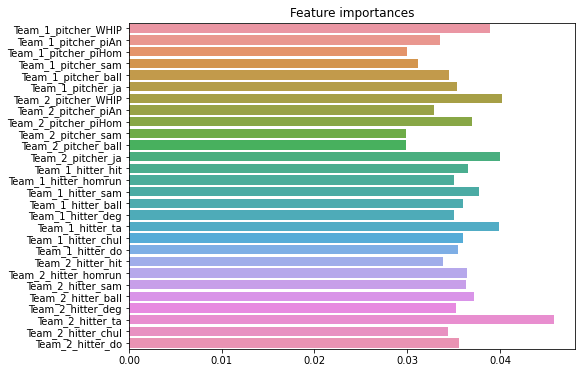

In [18]:
ftr_importances_values = rf_clf.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=X_train.columns)

plt.figure(figsize=(8, 6))
plt.title('Feature importances')
sns.barplot(x=ftr_importances, y=ftr_importances.index)
plt.show()

In [24]:
params = {
    'n_estimators':[100],
    'max_depth':[6, 8, 10, 12],
    'min_samples_leaf':[8, 12, 18],
    'min_samples_split':[8, 16, 20]
}

rf_clf2 = RandomForestClassifier(n_jobs=-1)
grid_cv = GridSearchCV(rf_clf2, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit(X_train, y_train)

print('최적 하이퍼 파라미터:\n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

최적 하이퍼 파라미터:
 {'max_depth': 8, 'min_samples_leaf': 18, 'min_samples_split': 16, 'n_estimators': 100}
최고 예측 정확도: 0.6175


In [34]:
rf_clf3 = RandomForestClassifier(n_estimators=300, max_depth=8, min_samples_leaf=12, min_samples_split=8, n_jobs=-1)
rf_clf3.fit(X_train, y_train)
pred = rf_clf3.predict(X_test)

print("예측 정확도:{0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도:0.6217
